In [ ]:
# library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
data = pd.read_excel("https://github.com/serlysetyani/fuzzyLogic/blob/main/restoran.xlsx?raw=true")
data

,id,pelayanan,makanan
0,1,58,7
1,2,54,1
2,3,98,2
3,4,52,4
4,5,11,4
...,...,...,...
95,96,30,1
96,97,25,3
97,98,27,10
98,99,8,6


In [ ]:
# function membership makanan
def poorFood(f):
    poorFood, goodFood = 4, 5

    if f <= poorFood:
        return 1
    elif f > poorFood:
        return 0
    elif f > poorFood and f <= goodFood:
        return ((goodFood - f) / (goodFood - poorFood))


def goodFood(f):
    poorFood, goodFood1, goodFood2, excellentFood = 4, 5, 7, 8

    if f >= goodFood1 and f <= goodFood2:
        return 1
    elif f < goodFood1 or f > goodFood2:
        return 0
    elif f > poorFood and f < goodFood1:
        return ((f - poorFood) / (goodFood1 - poorFood))
    elif f > goodFood2 and f < excellentFood:
        return ((goodFood2 - f) / (excellentFood - goodFood2))


def excellentFood(f):
    goodFood2, excellentFood = 7, 8

    if f >= excellentFood:
        return 1
    elif f < excellentFood:
        return 0
    elif f > goodFood2 and f <= excellentFood:
        return ((f - goodFood2) / (excellentFood - goodFood2))


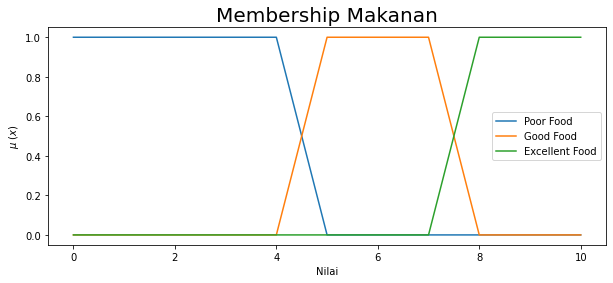

In [ ]:
# plot grafik membership makanan

x = [i for i in range(11)]

ypoorF = [poorFood(i) for i in x]
ygoodF = [goodFood(i) for i in x]
yexcellentF = [excellentFood(i) for i in x]

plt.figure(figsize=(10,4))
plt.title('Membership Makanan',fontsize = 20) 
plt.plot(x, ypoorF, label = 'Poor Food')
plt.plot(x, ygoodF, label = 'Good Food')
plt.plot(x, yexcellentF, label = 'Excellent Food')
plt.xlabel('Nilai')
plt.ylabel(r'$\mu\ (x)$')
plt.legend()

In [ ]:
# fuction membership pelayanan
def PoorService(x):
  poorService = 50
  goodService1 = 51

  if x <= poorService:
    return 1;
  elif x > poorService:
    return 0
  elif x >= poorService and x < goodService1:
    return (goodService1 - x) / (goodService1 - poorService)

def GoodService(x):
  poorService = 50
  goodService1 = 51
  goodService2 = 80
  excellentService = 81

  if x >= goodService1 and x <= goodService2:
    return 1
  elif x < goodService1 or x > goodService2:
    return 0
  elif x > poorService and x <= goodService1:
    return (x - poorService) / (goodService1 - poorService)
  elif x >= goodService2 and x < excellentService:
    return (excellentService - x) / (excellentService - goodService2)

def ExcellentService(x):
  goodService2 = 80
  excellentService = 81

  if x >= excellentService:
    return 1
  elif x < excellentService:
    return 0
  elif x > goodService2 and x <= excellentService:
    return (x - goodService2) / (excellentService - goodService2)

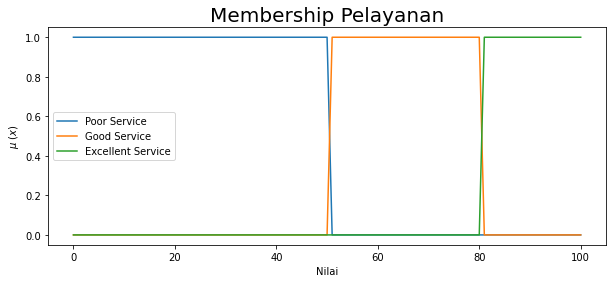

In [ ]:
# plot grafik membership pelayanan

x = [i for i in range(101)]

ypoorS = [PoorService(i) for i in x]
ygoodS = [GoodService(i) for i in x]
yexcellentS = [ExcellentService(i) for i in x]

plt.figure(figsize=(10,4))
plt.title('Membership Pelayanan',fontsize = 20) 
plt.plot(x, ypoorS, label = 'Poor Service')
plt.plot(x, ygoodS, label = 'Good Service')
plt.plot(x, yexcellentS, label = 'Excellent Service')
plt.xlabel('Nilai')
plt.ylabel(r'$\mu\ (x)$')
plt.legend()

In [ ]:
# function fuzzifikasi
def fuzzificationFood(foodValue):
  foodSet = []
  foodSet.append(poorFood(foodValue))
  foodSet.append(goodFood(foodValue))
  foodSet.append(excellentFood(foodValue))
  return foodSet

def fuzzificationService(serviceValue):
  serviceSet = []
  serviceSet.append(PoorService(serviceValue))
  serviceSet.append(GoodService(serviceValue))
  serviceSet.append(ExcellentService(serviceValue))
  return serviceSet


In [ ]:
# fungsi inferensi
def inference(serviceSet, foodSet):
  inferenceSet = []
  recommendedSet, moderatelySet, notRecommendedSet = [], [], []

  recommendedSet.append(min(foodSet[2], serviceSet[2]))
  recommendedSet.append(min(foodSet[2], serviceSet[1]))
  recommendedSet.append(min(foodSet[1], serviceSet[2]))
  

  moderatelySet.append(min(foodSet[1], serviceSet[1]))
  moderatelySet.append(min(foodSet[2], serviceSet[0]))

  notRecommendedSet.append(min(foodSet[0], serviceSet[0]))
  notRecommendedSet.append(min(foodSet[1], serviceSet[0]))
  notRecommendedSet.append(min(foodSet[0], serviceSet[1]))
  notRecommendedSet.append(min(foodSet[0], serviceSet[2]))

  inferenceSet.append(max(recommendedSet))
  inferenceSet.append(max(moderatelySet))
  inferenceSet.append(max(notRecommendedSet))
  
  return inferenceSet

In [ ]:
# fungsi defuzzifikasi
def defuzzification(inferenceSet):
  multiplier = (inferenceSet[0]*100) + (inferenceSet[1]*80) + (inferenceSet[2]*50) 
  divider = inferenceSet[0] + inferenceSet[1] + inferenceSet[2]
  return multiplier/divider



MAIN PROGRAM

In [ ]:
hasilAkhir = []
for row in range(100):
  fuzziPelayanan = fuzzificationService(data['pelayanan'][row])
  fuzziMakanan = fuzzificationFood(data['makanan'][row])
  inferensi = inference(fuzziPelayanan,fuzziMakanan)
  hasilAkhir.extend([defuzzification(inferensi)])
 
hasilAkhir[:5]

[80.0, 50.0, 50.0, 50.0, 50.0]

In [ ]:
hasilAkhir = []
for row in range(100):
  fuzziPelayanan = fuzzificationService(data['pelayanan'][row])
  fuzziMakanan = fuzzificationFood(data['makanan'][row])
  inferensi = inference(fuzziPelayanan,fuzziMakanan)
  hasilAkhir.extend([defuzzification(inferensi)])
 
data['hasil'] = hasilAkhir
data = data.sort_values(by=['hasil','makanan','pelayanan'], ascending=False)[:10]
data['id'].to_excel('peringkat.xls', index=True, header=False)

data

,id,pelayanan,makanan,hasil
41,42,94,10,100.0
68,69,86,10,100.0
53,54,64,10,100.0
24,25,61,10,100.0
5,6,59,10,100.0
23,24,100,9,100.0
78,79,87,9,100.0
21,22,79,9,100.0
30,31,74,9,100.0
69,70,78,8,100.0
